In [2]:
import cv2
import matplotlib.pyplot as plt
from os.path import join
from glob import glob
import pandas as pd

In [3]:
eye_GT = '../data/GroundTruth'
eye_img = '../data/train'

In [4]:
df = pd.read_csv(join(eye_GT, 'trainLabels.csv'))

In [5]:
df

,image,level
0,10_left,0
1,10_right,0
2,13_left,0
3,13_right,0
4,15_left,1
...,...,...
35121,44347_right,0
35122,44348_left,0
35123,44348_right,0
35124,44349_left,0


In [6]:
for i in range(5):
    print(i, df.level[df.level==i].count(), df.level[df.level==i].count()*0.8, df.level[df.level==i].count()*0.2)

0 25810 20648.0 5162.0
1 2443 1954.4 488.6
2 5292 4233.6 1058.4
3 873 698.4000000000001 174.60000000000002
4 708 566.4 141.6


In [7]:
val_dict = {'image':[], 'level':[]}
train_dict = {'image':[], 'level':[]}
for i in range(5):
    no_img = df.level[df.level==i].count()
    img_list = df.image[df.level==i].to_list()
    no_val = int(no_img*0.2)
    no_train = int(no_img*0.8)
    print(i, no_img, no_val, no_train)
    for j in range(no_img):
        if j%5==0:
            val_dict['image'].append(img_list[j])
            val_dict['level'].append(i)
        else:
            train_dict['image'].append(img_list[j])
            train_dict['level'].append(i)
#     break
#     print(len(val_dict), len(train_dict))

0 25810 5162 20648
1 2443 488 1954
2 5292 1058 4233
3 873 174 698
4 708 141 566


In [8]:
val_df = pd.DataFrame(val_dict)
train_df = pd.DataFrame(train_dict)

In [9]:
val_df.image

0           10_left
1           19_left
2          21_right
3           25_left
4          33_right
           ...     
7022    42484_right
7023    43050_right
7024     43339_left
7025     43997_left
7026    44247_right
Name: image, Length: 7027, dtype: object

In [10]:
for c in range(5):
    print(c, len(val_df[val_df.level==c]))

0 5162
1 489
2 1059
3 175
4 142


In [11]:
for c in range(5):
    print(c, len(train_df[train_df.level==c]))

0 20648
1 1954
2 4233
3 698
4 566


In [12]:
train_df

,image,level
0,10_right,0
1,13_left,0
2,13_right,0
3,17_left,0
4,19_right,0
...,...,...
28094,43998_left,4
28095,44100_left,4
28096,44247_left,4
28097,44249_left,4


In [17]:
train_df.to_csv('../data/GroundTruth/train.csv', index=False) 
val_df.to_csv('../data/GroundTruth/val.csv', index=False) 

In [13]:
img_list = glob(join(eye_img, '*.jpeg'))

In [16]:
def _resize(image):
    h,w,c = image.shape
    min_dim = min(h, w)
    img_t = image[:, int(w/2-min_dim/2):int(w/2+min_dim/2)]
    img_t = cv2.resize(img_t, (300, 300))
    return img_t

../data/train\12649_right.jpeg


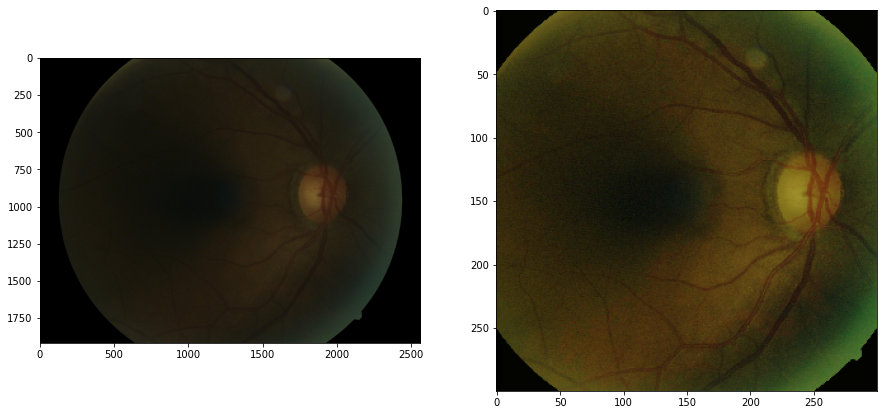

In [19]:
img = cv2.cvtColor(cv2.imread(join(eye_img, '12649_right.jpeg')), cv2.COLOR_BGR2RGB)
equ = img.copy()
cla = img.copy()
cla = _resize(cla)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(2,2))
for i in range(2):
    cla[:, :, i] = clahe.apply(cla[:, :, i])
    equ[:, :, i] = cv2.equalizeHist(img[:, :, i])
f, axarr = plt.subplots(1,2, figsize=(15,10))
axarr[0].imshow(img)
# axarr[1].imshow(equ)
axarr[1].imshow(cla)
print(join(eye_img, '12649_right.jpeg'))

In [15]:
hs = []
ws = []
for i in img_list:
    img = cv2.imread(i)
    h, w, c = img.shape
    hs.append(h)
    ws.append(w)

KeyboardInterrupt: 

In [16]:
df = pd.DataFrame({'height':hs, 'width':ws})

In [17]:
df.describe()

,height,width
count,23435.000000,23435.000000
mean,2473.586985,3638.519735
std,470.922449,799.844869
min,289.000000,400.000000
25%,1957.000000,2816.000000
50%,2592.000000,3888.000000
75%,2592.000000,3888.000000
max,3456.000000,5184.000000


<AxesSubplot:>

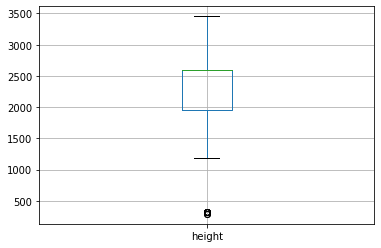

In [22]:
df.boxplot(column =['height'], grid = True)

<AxesSubplot:>

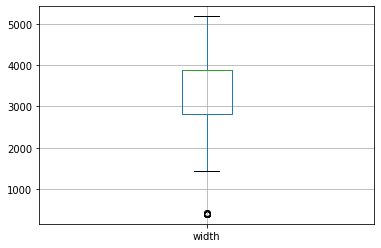

In [23]:
df.boxplot(column =['width'], grid = True) 